# Data Glacier Internship

Deliverable - Week 12

Random Forest Algorithm

Nahari Terena - LISUM15

## Problem Statement

One of the challenge for all Pharmaceutical companies is to understand the persistency of drug as per the physician prescription. To solve this problem ABC pharma company approached an analytics company to automate this process of identification.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn
seaborn.set(style='ticks')
from sklearn.preprocessing import LabelEncoder
import numpy 

from sklearn.model_selection import train_test_split as TTS
from sklearn.ensemble import RandomForestClassifier as RF

import matplotlib.pyplot as plt
from yellowbrick.classifier import ConfusionMatrix

from yellowbrick.classifier import ROCAUC

### Import dataset

In [2]:
data = pd.read_csv('Healthcare_clean.csv', sep = ";")
df = data.drop(['Ptid'], axis=1)
df.tail()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
3419,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,...,0,0,1,0,0,0,0,0,0,1
3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,...,0,0,0,0,0,0,0,0,0,0
3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,0,...,0,0,1,0,0,0,0,0,0,1
3422,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,...,0,0,0,0,0,0,0,0,0,0
3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,1,...,0,0,1,0,0,0,0,0,0,1


In [3]:
df.shape

(3424, 64)

### Label Encoder

In [4]:
le = LabelEncoder()

df['Persistency_Flag'] = le.fit_transform(df['Persistency_Flag'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Race'] = le.fit_transform(df['Race'])
df['Ethnicity'] = le.fit_transform(df['Ethnicity'])
df['Region'] = le.fit_transform(df['Region'])
df['Ntm_Speciality'] = le.fit_transform(df['Ntm_Speciality'])
df['Ntm_Specialist_Flag'] = le.fit_transform(df['Ntm_Specialist_Flag'])
df['Ntm_Speciality_Bucket'] = le.fit_transform(df['Ntm_Speciality_Bucket'])
df['Adherent_Flag'] = le.fit_transform(df['Adherent_Flag'])

## transforming the Age_Bucket variable to numeric. 
df.replace(to_replace={
        ">75": 0,
        "65-75": 1,
        "55-65": 2,
        "<55": 3
    },
        inplace=True)

df.head()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,1,1,2,1,4,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,4,2,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,3,0,0,1,1,0,1,0,...,0,1,0,0,0,0,0,0,0,2
3,0,0,2,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,2,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1


### Feature Selection

In [5]:
def chi_square(df,var1,var2):
    df_ct = pd.crosstab(df[var1],df[var2])
    df_ct['Total']=df_ct.sum(axis=1)
    df_ct.loc['Total1'] = df_ct.sum(axis = 0, skipna = True)
    df_cq = pd.DataFrame()
    df_cq['Observed'] = np.array([df_ct.iloc[0][0],df_ct.iloc[0][1],df_ct.iloc[1][0],df_ct.iloc[1][1]])
    df_cq['Expected'] = np.array([(df_ct.loc[0]['Total'] * df_ct.loc['Total1'][0] / df_ct.loc['Total1']['Total']),
                                  (df_ct.loc[0]['Total'] * df_ct.loc['Total1'][1] / df_ct.loc['Total1']['Total']),
                                  (df_ct.loc[1]['Total'] * df_ct.loc['Total1'][0] / df_ct.loc['Total1']['Total']),
                                  (df_ct.loc[1]['Total'] * df_ct.loc['Total1'][1] / df_ct.loc['Total1']['Total']),
                                 ])
    df_cq['Chi-Square'] = ((df_cq['Observed'] - df_cq['Expected']) ** 2) / df_cq['Expected']
    chi_square =  df_cq['Chi-Square'].sum()
    return df_cq,chi_square

In [9]:
def variable_chiq(column):
    list_re = []
    for i in risk_column:
        result = chi_square(df,i,'Persistency_Flag')
        list_re.append((i,result[1]))
    list_chiq = list(zip(list_re))
    return list_chiq

In [12]:
risk_column = [
 'Gender',
 'Ntm_Specialist_Flag',
 'Gluco_Record_Prior_Ntm', 
 'Gluco_Record_During_Rx',
 'Dexa_During_Rx',
 'Frag_Frac_Prior_Ntm',
 'Frag_Frac_During_Rx',
 'Risk_Segment_Prior_Ntm',
 'Tscore_Bucket_Prior_Ntm',
 'Adherent_Flag',
 'Idn_Indicator',
 'Injectable_Experience_During_Rx',
 'Idn_Indicator',
 'Injectable_Experience_During_Rx',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Vitamin_D_Deficiency',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Dorsalgia',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
 'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
 'Comorb_Osteoporosis_without_current_pathological_fracture',
 'Comorb_Personal_history_of_malignant_neoplasm',
 'Comorb_Gastro_esophageal_reflux_disease',
 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations',
 'Concom_Narcotics',
 'Concom_Systemic_Corticosteroids_Plain',
 'Concom_Anti_Depressants_And_Mood_Stabilisers',
 'Concom_Fluoroquinolones',
 'Concom_Cephalosporins',
 'Concom_Macrolides_And_Similar_Types',
 'Concom_Broad_Spectrum_Penicillins',
 'Concom_Anaesthetics_General',
 'Concom_Viral_Vaccines',
 'Risk_Type_1_Insulin_Dependent_Diabetes',
 'Risk_Osteogenesis_Imperfecta',
 'Risk_Rheumatoid_Arthritis',
 'Risk_Untreated_Chronic_Hyperthyroidism',
 'Risk_Untreated_Chronic_Hypogonadism',
 'Risk_Untreated_Early_Menopause',
 'Risk_Patient_Parent_Fractured_Their_Hip',
 'Risk_Smoking_Tobacco',
 'Risk_Chronic_Malnutrition_Or_Malabsorption',
 'Risk_Chronic_Liver_Disease',
 'Risk_Family_History_Of_Osteoporosis',
 'Risk_Low_Calcium_Intake',
 'Risk_Vitamin_D_Insufficiency',
 'Risk_Poor_Health_Frailty',
 'Risk_Excessive_Thinness',
 'Risk_Hysterectomy_Oophorectomy',
 'Risk_Estrogen_Deficiency',
 'Risk_Immobilization',
 'Risk_Recurring_Falls']
variable_chiq(risk_column)

[(('Gender', 0.3662740573272759),),
 (('Ntm_Specialist_Flag', 66.52351844509595),),
 (('Gluco_Record_Prior_Ntm', 0.1135120264282353),),
 (('Gluco_Record_During_Rx', 154.9117442906466),),
 (('Dexa_During_Rx', 828.2305552641726),),
 (('Frag_Frac_Prior_Ntm', 0.0003460155406185617),),
 (('Frag_Frac_During_Rx', 39.154122704885225),),
 (('Risk_Segment_Prior_Ntm', 0.5115518918661821),),
 (('Tscore_Bucket_Prior_Ntm', 1.2235147986233286),),
 (('Adherent_Flag', 43.32584810512328),),
 (('Idn_Indicator', 42.52224538360116),),
 (('Injectable_Experience_During_Rx', 33.12644286207904),),
 (('Idn_Indicator', 42.52224538360116),),
 (('Injectable_Experience_During_Rx', 33.12644286207904),),
 (('Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
   355.7205894617797),),
 (('Comorb_Encounter_For_Immunization', 339.50253384858087),),
 (('Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
   287.61712566345136),),
 (('Comorb_Vitamin_D_Deficiency', 102.07953114488615),),
 (('Comorb_Other

In [13]:
feature_selected = ['Persistency_Flag',
 'Race',
 'Ethnicity', 
 'Region',
 'Age_Bucket',
 'Ntm_Speciality',
 'Ntm_Speciality_Bucket',
 'Dexa_Freq_During_Rx',
 'Ntm_Specialist_Flag',
 'Gluco_Record_During_Rx',
 'Dexa_During_Rx',
 'Frag_Frac_During_Rx',
 'Adherent_Flag',
 'Injectable_Experience_During_Rx',
 'Idn_Indicator',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Vitamin_D_Deficiency',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Dorsalgia',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
 'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
 'Comorb_Osteoporosis_without_current_pathological_fracture',
 'Comorb_Personal_history_of_malignant_neoplasm',
 'Comorb_Gastro_esophageal_reflux_disease',
 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations',
 'Concom_Narcotics',
 'Concom_Systemic_Corticosteroids_Plain',
 'Concom_Anti_Depressants_And_Mood_Stabilisers',
 'Concom_Fluoroquinolones',
 'Concom_Cephalosporins',
 'Concom_Macrolides_And_Similar_Types',
 'Concom_Broad_Spectrum_Penicillins',
 'Concom_Anaesthetics_General',
 'Concom_Viral_Vaccines',
 'Risk_Rheumatoid_Arthritis',
 'Risk_Untreated_Chronic_Hypogonadism',
 'Risk_Smoking_Tobacco',
 'Risk_Chronic_Malnutrition_Or_Malabsorption',
 'Risk_Vitamin_D_Insufficiency',
 'Risk_Poor_Health_Frailty',
 'Risk_Excessive_Thinness',
 'Risk_Immobilization'
                   ]

In [14]:
df_fs = df[feature_selected]
df_fs

,Persistency_Flag,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Speciality_Bucket,Dexa_Freq_During_Rx,Ntm_Specialist_Flag,Gluco_Record_During_Rx,...,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hypogonadism,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Immobilization
0,1,2,1,4,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,4,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,3,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,1,0,0,1,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0
4,0,2,1,0,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,1,2,1,3,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3420,1,2,1,3,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3421,1,2,1,3,0,0,0,7,1,0,...,1,0,0,0,0,0,1,0,0,0
3422,0,2,1,3,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Random Forest

In [15]:
from sklearn.model_selection import train_test_split as TTS
train,test=TTS(df_fs,test_size=0.15,random_state=0)

train_x = train.loc[:, train.columns != 'Persistency_Flag']
train_y = train['Persistency_Flag']
test_x = test.loc[:, test.columns != 'Persistency_Flag']
test_y = test['Persistency_Flag']

In [16]:
from sklearn.ensemble import RandomForestClassifier as RF
logit=RF(n_jobs=2,n_estimators=1000, max_depth=10, min_samples_split=12)
logit.fit(train_x,train_y)

RandomForestClassifier(max_depth=10, min_samples_split=12, n_estimators=1000,
                       n_jobs=2)

In [17]:
logit.score(train_x,train_y)

0.8852233676975945

In [18]:
logit.score(test_x,test_y)

0.8132295719844358

In [19]:
colum_p = train_x.columns.values.tolist()

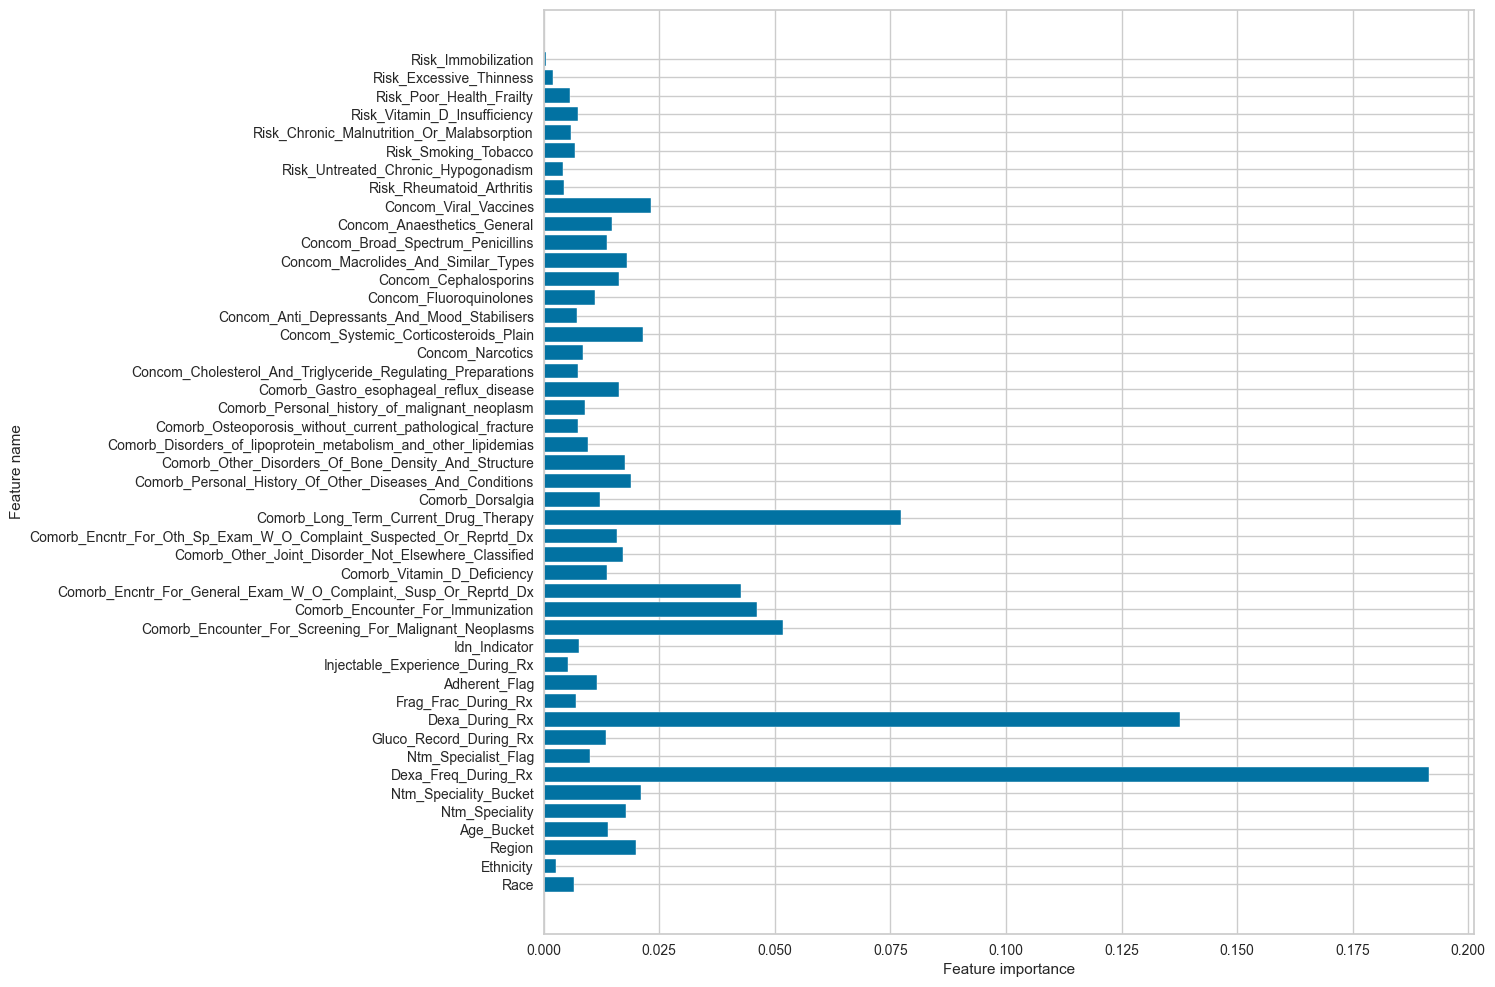

In [20]:
c_features = len(colum_p)
fig, ax = plt.subplots(figsize=(12, 12))
plt.barh(range(c_features), logit.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(numpy.arange(c_features), colum_p)
plt.show()

C:\Users\Olnalu\AppData\Local\Programs\Python\Python311\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


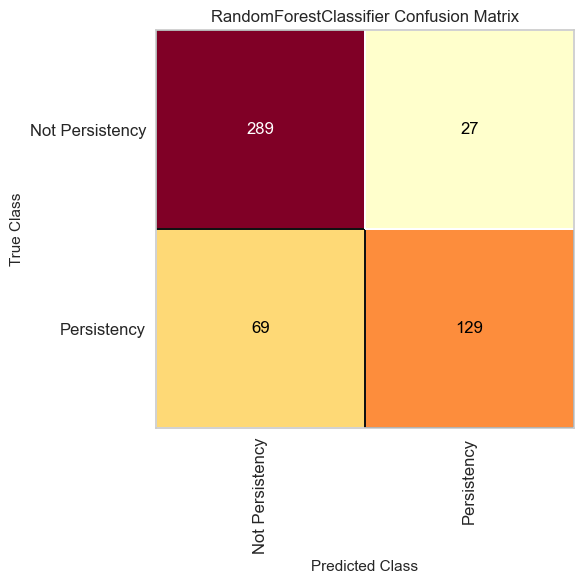

<AxesSubplot: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [21]:
import matplotlib.pyplot as plt
from yellowbrick.classifier import ConfusionMatrix
mapping = {0: "Not Persistency", 1: "Persistency"}
fig, ax = plt.subplots(figsize=(6, 6))
cm_viz = ConfusionMatrix(
    logit,
    classes=["Not Persistency", "Persistency"],
    label_encoder=mapping
)
cm_viz.score(test_x, test_y)
cm_viz.poof()

C:\Users\Olnalu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


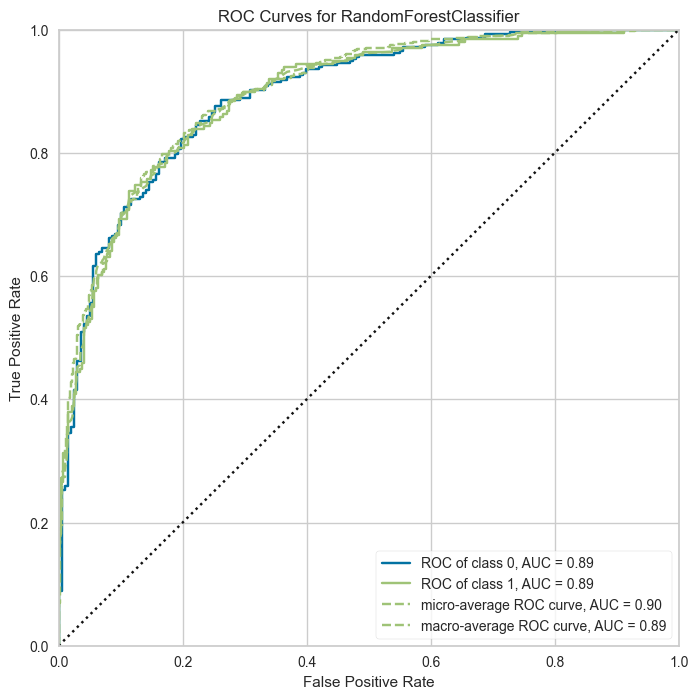

<AxesSubplot: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [22]:
from yellowbrick.classifier import ROCAUC
fig, ax = plt.subplots(figsize=(8, 8))
roc_viz = ROCAUC(logit)
roc_viz.fit(test_x, test_y) 
roc_viz.score(test_x, test_y)
roc_viz.poof()